<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/bdu.8.2KNN.iris%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN ( K - Nearest Neighbor )알고리즘

  1 알고리즘 개요
    . KNN 알고리즘은 지도학습의 한 종류로,
      정답이 있는 데이터를 사용하여 분류 작업을 수행한다.
      . 서로 가까운 점들은 유사하다는 가정하에, 데이터로부터 거리가 가까운 K개의 다른 데이터의 정답(목표값)을 참조하여 분류

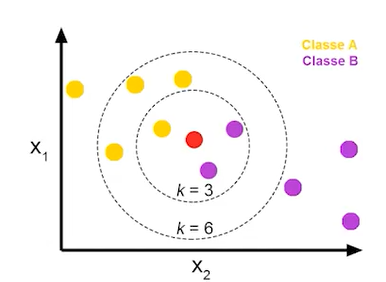

KNN 알고리즘은 지도 학습의 한 종류로, 정답이 있는 데이터를 사용하여 분류 작업을 한다.

서로 가까운 점들은 유사하다는 가정하에, 데이터로부터 거리가 가까운 K개의 다른 데이터의 정답을 참조하여 분류한다.


- KNN 알고리즘은** 변수별 단위**가 무엇이냐에 따라 거리가 달라지고, 분류 결과가 달라질 수 있음.
- 따라서 KNN 알고리즘을 적용할 때에는 사전에 **데이터를 표준화 하여야 한다.**



In [ ]:
##KNN을 이용한 붓꽃 분류


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# KNN model
from sklearn.neighbors import KNeighborsClassifier
# 학습 및 테스트 데이터셋 분리를 위한 패키지 임포트
from sklearn.model_selection import train_test_split


In [ ]:
# call data
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.info()  # missing value check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
### 4. data
## 독립 변수별 Min-Max 정규화 (0-1 사이의 값으로 변환)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[["sepal_length"]] = scaler.fit_transform(df[["sepal_length"]])
df[["sepal_width"]] = scaler.fit_transform(df[["sepal_width"]])
df[["petal_length"]] = scaler.fit_transform(df[["petal_length"]])
df[["petal_width"]] = scaler.fit_transform(df[["petal_width"]])


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


In [ ]:
## 5. 분석 data set
## X는 독립 변수, y는 종속 변수

In [ ]:
X=df[["sepal_length","sepal_width","petal_length","petal_width"]]
y=df[["species"]]


In [ ]:
# 분석 data  분할 (8:2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


In [ ]:
##6. 데이터 분석 수행
# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train , y_train)

C:\Users\cst_3\anaconda3\envs\vconda_jungbg\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
##7. 성능 평가 및 시각화

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)

0.9333333333333333


In [ ]:
pred.shape

(30,)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train , y_train)

C:\Users\cst_3\anaconda3\envs\vconda_jungbg\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=12)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(acc)


0.9333333333333333
